# Introduction to Matplotlib

---

## Using the matplotlib.pyplot Interface

**Importing Libraries**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### Creating a blank plot

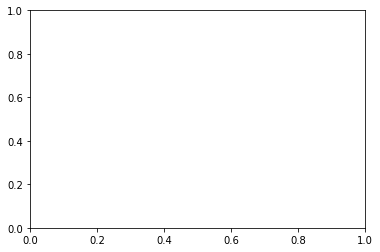

In [3]:
# Create a Figure and an Axes with plt.subplots
fig, ax = plt.subplots()
plt.show()

---

## Adding Data to an axes object

In [4]:
# Loading Datasets
seattle_weather = pd.read_csv("D:/git_repositories/Datacamp-Introduction_to_Data_Visualization_with_Matplotlib/Datasets/seattle_weather.csv")
austin_weather = pd.read_csv("D:/git_repositories/Datacamp-Introduction_to_Data_Visualization_with_Matplotlib/Datasets/austin_weather.csv")

**Datasets**

In [5]:
sw = seattle_weather.loc[:,["STATION", "NAME", "DATE", "MLY-PRCP-NORMAL"]]

In [6]:
aw = austin_weather.loc[:, ["STATION", "NAME", "DATE", "MLY-PRCP-NORMAL"]]

In [10]:
month = []
x = range(1,13)
m = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
for x in sw["DATE"]:
    if x == 1:
        month.append(m[0])
    elif x == 2:
        month.append(m[1])
    elif x == 3:
        month.append(m[2])
    elif x == 4:
        month.append(m[3])
    elif x == 5:
        month.append(m[4])
    elif x == 6:
        month.append(m[5])
    elif x == 7:
        month.append(m[6])
    elif x == 8:
        month.append(m[7])
    elif x == 9:
        month.append(m[8])
    elif x == 10:
        month.append(m[9])
    elif x == 11:
        month.append(m[10])
    elif x == 12:
        month.append(m[11])

In [12]:
month = []
x = range(1,13)
m = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
for x in aw["DATE"]:
    if x == 1:
        month.append(m[0])
    elif x == 2:
        month.append(m[1])
    elif x == 3:
        month.append(m[2])
    elif x == 4:
        month.append(m[3])
    elif x == 5:
        month.append(m[4])
    elif x == 6:
        month.append(m[5])
    elif x == 7:
        month.append(m[6])
    elif x == 8:
        month.append(m[7])
    elif x == 9:
        month.append(m[8])
    elif x == 10:
        month.append(m[9])
    elif x == 11:
        month.append(m[10])
    elif x == 12:
        month.append(m[11])

In [11]:
sw["MONTH"] = month

In [13]:
aw["MONTH"] = month

In [14]:
sw.head()

,STATION,NAME,DATE,MLY-PRCP-NORMAL,MONTH
0,USC00456295,"PALMER 3 ESE, WA US",1,11.03,Jan
1,USC00456295,"PALMER 3 ESE, WA US",2,7.74,Feb
2,USC00456295,"PALMER 3 ESE, WA US",3,9.08,Mar
3,USC00456295,"PALMER 3 ESE, WA US",4,7.37,Apr
4,USC00456295,"PALMER 3 ESE, WA US",5,6.39,May


In [15]:
aw.head()

,STATION,NAME,DATE,MLY-PRCP-NORMAL,MONTH
0,USW00013904,"AUSTIN BERGSTROM INTERNATIONAL AIRPORT, TX US",1,2.20,Jan
1,USW00013904,"AUSTIN BERGSTROM INTERNATIONAL AIRPORT, TX US",2,2.31,Feb
2,USW00013904,"AUSTIN BERGSTROM INTERNATIONAL AIRPORT, TX US",3,2.78,Mar
3,USW00013904,"AUSTIN BERGSTROM INTERNATIONAL AIRPORT, TX US",4,2.27,Apr
4,USW00013904,"AUSTIN BERGSTROM INTERNATIONAL AIRPORT, TX US",5,4.05,May


<AxesSubplot:xlabel='MONTH'>

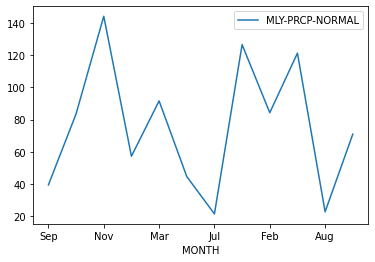

In [39]:
seattle = sw.loc[:, ["MONTH", "MLY-PRCP-NORMAL"]].groupby(sw["MONTH"], as_index= True).agg({'MLY-PRCP-NORMAL':'sum'}).sort_values("MONTH", ascending= False)
seattle.plot(
    kind = 'line'
)

In [18]:
# Plotting MLY-PRCP-NORMAL from seattle_weather against the MONTH

ax.plot(sw["MONTH"], sw["MLY-PRCP-NORMAL"], marker = 'o', linestyle = '--')
ax.plot(aw["MONTH"], aw["MLY-PRCP-NORMAL"], marker = 'v', linestyle = '--')

# Customize the x-axis label
ax.set_xlabel("Time (months)")

# Customize the y-axis label
ax.set_ylabel("Precipitation (inches)")

# Add the title
ax.set_title("Weather patterns in Austin and Seattle")

# Display the figure
plt.show()

In [ ]:
# Create a Figure and an array of subplots with 2 rows and 2 columns
fig, ax = plt.subplots(2, 2)

# Addressing the top left Axes as index 0, 0, plot month and Seattle precipitation
ax[0, 0].plot(seattle_weather["MONTH"], seattle_weather["MLY-PRCP-NORMAL"])

# In the top right (index 0,1), plot month and Seattle temperatures
ax[0, 1].plot(seattle_weather["MONTH"], seattle_weather["MLY-TAVG-NORMAL"])

# In the bottom left (1, 0) plot month and Austin precipitations
ax[1, 0].plot(austin_weather["MONTH"], austin_weather["MLY-PRCP-NORMAL"])

# In the bottom right (1, 1) plot month and Austin temperatures
ax[1, 1].plot(austin_weather["MONTH"], austin_weather["MLY-TAVG-NORMAL"])
plt.show()

In [ ]:
# Create a figure and an array of axes: 2 rows, 1 column with shared y axis
fig, ax = plt.subplots(2, 1, sharey=True)

# Plot Seattle precipitation data in the top axes
ax[0].plot(seattle_weather["MONTH"], seattle_weather["MLY-PRCP-NORMAL"], color = 'b')
ax[0].plot(seattle_weather["MONTH"], seattle_weather["MLY-PRCP-25PCTL"], color = 'b', linestyle = '--')
ax[0].plot(seattle_weather["MONTH"], seattle_weather["MLY-PRCP-75PCTL"], color = 'b', linestyle = '--')

# Plot Austin precipitation data in the bottom axes
ax[1].plot(austin_weather["MONTH"], austin_weather["MLY-PRCP-NORMAL"], color = 'r')
ax[1].plot(austin_weather["MONTH"], austin_weather["MLY-PRCP-25PCTL"], color = 'r', linestyle = '--')
ax[1].plot(austin_weather["MONTH"], austin_weather["MLY-PRCP-75PCTL"], color = 'r', linestyle = '--')

plt.show()

---

In [3]:
# Read the data from file using read_csv
climate_change = pd.read_csv("D:/git_repositories/Datacamp-Introduction_to_Data_Visualization_with_Matplotlib/Datasets/climate_change.csv",parse_dates = ["date"] , index_col = "date")

In [4]:
climate_change.head()

,co2,relative_temp
date,,
1958-03-06,315.71,0.10
1958-04-06,317.45,0.01
1958-05-06,317.50,0.08
1958-06-06,NaN,-0.05
1958-07-06,315.86,0.06


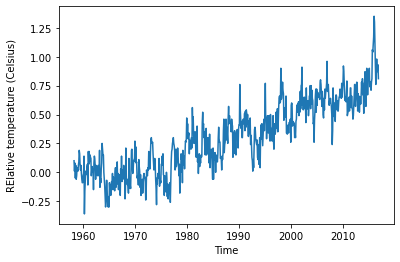

In [6]:
fig, ax = plt.subplots()

# Add the time-series for "relative_temp" to the plot

ax.plot(climate_change.index, climate_change["relative_temp"])

# Set the x-axis label
ax.set_xlabel("Time")

# Set the y-axis label
ax.set_ylabel("RElative temperature (Celsius)")

# Show the figure
plt.show()

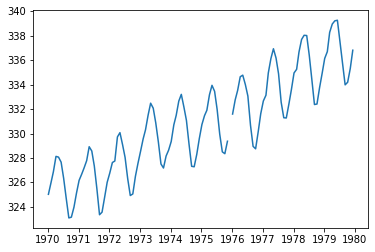

In [11]:
fig, ax = plt.subplots()
# Create variable seventies with data from "1970-01-01" to "1979-12-31"
seventies = climate_change["1970-01-01":"1979-12-31"]

# Add the time-series for "co2" data from seventies to the plot
ax.plot(seventies.index, seventies["co2"])

# Show the figure
plt.show()

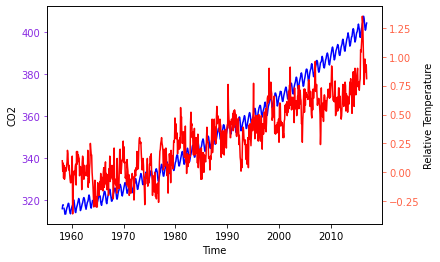

In [17]:
# Initalize a Figure and Axes

fig, ax = plt.subplots()

# Plot the CO2 variable in blue
ax.plot(climate_change.index, climate_change["co2"], color= "blue")

ax.tick_params('y', colors = 'blueviolet')

ax.set_xlabel("Time")

ax.set_ylabel("CO2")

# Create a twin Axes that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature in red
ax2.plot(climate_change.index, climate_change["relative_temp"], color="red")

ax2.set_ylabel("Relative Temperature")
ax2.tick_params('y', colors = 'tomato')

plt.show()

In [19]:
# Define a function called plot_timeseries
def plot_timeseries(axes, x, y, color, xlabel, ylabel):

  # Plot the inputs x,y in the provided color
  axes.plot(x, y, color= color)

  # Set the x-axis label
  axes.set_xlabel(xlabel)

  # Set the y-axis label
  axes.set_ylabel(ylabel, color=color)

  # Set the colors tick params for y-axis
  axes.tick_params('y', colors= color)

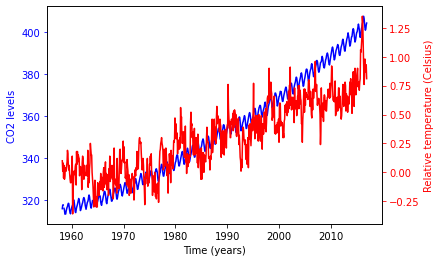

In [20]:
fig, ax = plt.subplots()

# Plot the CO2 levels time-series in blue
plot_timeseries(ax, climate_change.index, climate_change["co2"], 'blue', "Time (years)", "CO2 levels")

# Create a twin Axes object that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature data in red
plot_timeseries(ax2, climate_change.index, climate_change['relative_temp'], 'red', "Time (years)", "Relative temperature (Celsius)")

plt.show()

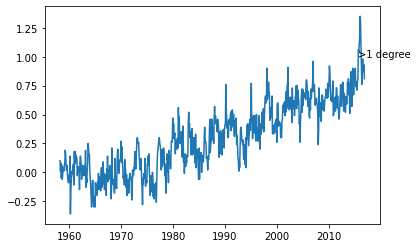

In [21]:
fig, ax = plt.subplots()

# Plot the relative temperature data
ax.plot(
    climate_change.index, climate_change["relative_temp"]
)

# Annotate the date at which temperatures exceeded 1 degree
ax.annotate('>1 degree', xy=(pd.Timestamp('2015-10-06'), 1))

plt.show()

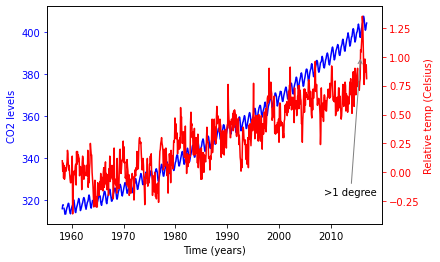

In [22]:
fig, ax = plt.subplots()

# Plot the CO2 levels time-series in blue
plot_timeseries(ax, climate_change.index, climate_change["co2"], 'blue', "Time (years)", "CO2 levels")

# Create an Axes object that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature data in red
plot_timeseries(ax2, climate_change.index, climate_change['relative_temp'], 'red', "Time (years)", "Relative temp (Celsius)")

# Annotate the point with relative temperature >1 degree
ax2.annotate(">1 degree", xy=(pd.Timestamp('2015-10-06'), 1), xytext=(pd.Timestamp('2008-10-06'), -0.2), arrowprops={'arrowstyle':'->', 'color':'gray'})

plt.show()

---

### Quantative Comparisons

**Loading Dataset**

In [23]:
medals = pd.read_csv("D:/git_repositories/Datacamp-Introduction_to_Data_Visualization_with_Matplotlib/Datasets/medals_by_country_2016.csv", index_col = 0)

In [24]:
medals.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, United States to Japan
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Bronze  10 non-null     int64
 1   Gold    10 non-null     int64
 2   Silver  10 non-null     int64
dtypes: int64(3)
memory usage: 320.0+ bytes


In [25]:
medals.shape

(10, 3)

In [26]:
medals.isna().sum()

Bronze    0
Gold      0
Silver    0
dtype: int64

In [27]:
medals.head()

,Bronze,Gold,Silver
United States,67,137,52
Germany,67,47,43
Great Britain,26,64,55
Russia,35,50,28
China,35,44,30


In [28]:
medals.tail()

,Bronze,Gold,Silver
France,21,20,55
Australia,25,23,34
Italy,24,8,38
Canada,61,4,4
Japan,34,17,13


C:\Users\ishti\AppData\Local\Temp\ipykernel_2152\3209095712.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(medals.index, rotation = 40)


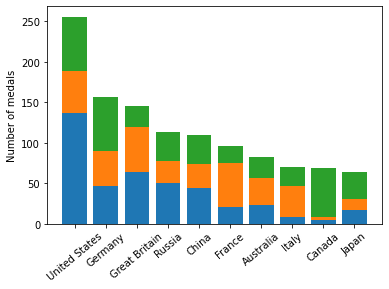

In [41]:
# Show bars of the index(rows)

fig, ax = plt.subplots()

ax.bar(
    medals.index,
    medals["Gold"]
)
ax.bar(
    medals.index,
    medals["Silver"],
    bottom = medals["Gold"]
)

ax.bar(
    medals.index, medals["Bronze"],
    bottom = medals["Gold"] + medals["Silver"]
)

ax.set_xticklabels(medals.index, rotation = 40)
ax.set_ylabel("Number of medals")

plt.show()